# Objective: 

1. Prime goal : identify reasons for customer default
                default: Any customer who is not paying the bill continously for 3 months
                
2. what are distinguish characterstics of default and non default customers
3. what are factors which are influcing the defaulter

Future: based on histroical data, can we predict who is going to become the defaulter?

scope: to mitigate the risk and save the amount and make the decision for financial plannings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy import stats
import os
import warnings

In [2]:
loan=pd.read_csv(r"C:\ksr\data science\DS_batch1\Practical_dataset\Give me some Credit\cs-training.csv")

# Basic sanity/quality check

In [3]:
loan.shape

(150000, 12)

In [4]:
loan.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

# renaming the column names

In [5]:
loan.rename(columns={'SeriousDlqin2yrs':"default","RevolvingUtilizationOfUnsecuredLines":"revol_pct",
                    'NumberOfTime30-59DaysPastDueNotWorse':"no_30_59_def",
                    'NumberOfOpenCreditLinesAndLoans':"cnt_open_loans",
                    'NumberOfTimes90DaysLate':"no_of_90_late",
                    'NumberRealEstateLoansOrLines':"cnt_real_esate_loans",
                    'NumberOfTime60-89DaysPastDueNotWorse':"no_60_89_def",
                    'NumberOfDependents':"depdents"},inplace=True)

In [6]:
loan.head(2)

,Sr_No,default,revol_pct,age,no_30_59_def,DebtRatio,MonthlyIncome,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sr_No                 150000 non-null  int64  
 1   default               150000 non-null  int64  
 2   revol_pct             150000 non-null  float64
 3   age                   150000 non-null  int64  
 4   no_30_59_def          150000 non-null  int64  
 5   DebtRatio             150000 non-null  float64
 6   MonthlyIncome         120269 non-null  float64
 7   cnt_open_loans        150000 non-null  int64  
 8   no_of_90_late         150000 non-null  int64  
 9   cnt_real_esate_loans  150000 non-null  int64  
 10  no_60_89_def          150000 non-null  int64  
 11  depdents              146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


# memory optimization

In [8]:
""" iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
"""
df=loan.copy()
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))   

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sr_No                 150000 non-null  int32  
 1   default               150000 non-null  int8   
 2   revol_pct             150000 non-null  float16
 3   age                   150000 non-null  int8   
 4   no_30_59_def          150000 non-null  int8   
 5   DebtRatio             150000 non-null  float32
 6   MonthlyIncome         120269 non-null  float32
 7   cnt_open_loans        150000 non-null  int8   
 8   no_of_90_late         150000 non-null  int8   
 9   cnt_real_esate_loans  150000 non-null  int8   
 10  no_60_89_def          150000 non-null  int8   
 11  depdents              146076 non-null  float16
dtypes: float16(2), float32(2), int32(1), int8(7)
memory usage: 3.3 MB


# changing the type of attributes based its nature

In [10]:
loan["no_30_59_def"]=loan["no_30_59_def"].astype("category")
loan["cnt_open_loans"]=loan["cnt_open_loans"].astype("category")
loan["cnt_real_esate_loans"]=loan["cnt_real_esate_loans"].astype("category")
loan["no_60_89_def"]=loan["no_60_89_def"].astype("category")
loan["no_of_90_late"]=loan["no_of_90_late"].astype("category")
loan["depdents"]=loan["depdents"].astype("category")

In [11]:
loan.dtypes

Sr_No                      int64
default                    int64
revol_pct                float64
age                        int64
no_30_59_def            category
DebtRatio                float64
MonthlyIncome            float64
cnt_open_loans          category
no_of_90_late           category
cnt_real_esate_loans    category
no_60_89_def            category
depdents                category
dtype: object

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Sr_No                 150000 non-null  int64   
 1   default               150000 non-null  int64   
 2   revol_pct             150000 non-null  float64 
 3   age                   150000 non-null  int64   
 4   no_30_59_def          150000 non-null  category
 5   DebtRatio             150000 non-null  float64 
 6   MonthlyIncome         120269 non-null  float64 
 7   cnt_open_loans        150000 non-null  category
 8   no_of_90_late         150000 non-null  category
 9   cnt_real_esate_loans  150000 non-null  category
 10  no_60_89_def          150000 non-null  category
 11  depdents              146076 non-null  category
dtypes: category(6), float64(3), int64(3)
memory usage: 7.7 MB


In [13]:
path=r"C:\Users\Koti\Documents\Data_Science\DS_FEB_2020\codes\standard_code\userdefined_functions"

In [14]:
os.chdir(path)

# Summary statstics for numerical variable

In [15]:
from summary_stats import summary_stat

In [16]:
summary_stat(loan)

,count,min,5%,25%,50%,mean,75%,90%,95%,99.7%,max,std
Sr_No,150000.0,1.0,7500.950000,37500.750000,75000.500000,75000.500000,112500.250000,135000.100000,142500.05,149550.003000,150000.0,43301.414527
default,150000.0,0.0,0.000000,0.000000,0.000000,0.066840,0.000000,0.000000,1.00,1.000000,1.0,0.249746
revol_pct,150000.0,0.0,0.000000,0.029867,0.154181,6.048438,0.559046,0.981278,1.00,1.760802,50708.0,249.755371
age,150000.0,0.0,29.000000,41.000000,52.000000,52.295207,63.000000,72.000000,78.00,91.000000,109.0,14.771866
DebtRatio,150000.0,0.0,0.004329,0.175074,0.366508,353.005076,0.868254,1267.000000,2449.00,7300.006000,329664.0,2037.818523
MonthlyIncome,120269.0,0.0,1300.000000,3400.000000,5400.000000,6670.221237,8249.000000,11666.000000,14587.60,45000.000000,3008750.0,14384.674215


# Summary statstics for categorical variables

In [17]:
from categorical_summary import char_summary

In [18]:
abc=char_summary(loan)

In [19]:
import researchpy as rp
def char_summary(data1):
    data2=data1.select_dtypes(include="category")
    ab=rp.summary_cat(data2)
    return ab

In [20]:
ab=char_summary(data1=loan)

In [21]:
type(ab)

pandas.core.frame.DataFrame

In [22]:
ab

,Variable,Outcome,Count,Percent
0,no_30_59_def,0.0,126018,84.01
1,,1.0,16033,10.69
2,,2.0,4598,3.07
3,,3.0,1754,1.17
4,,4.0,747,0.50
...,...,...,...,...
142,,8.0,24,0.02
143,,10.0,5,0.00
144,,9.0,5,0.00
145,,20.0,1,0.00


In [23]:
loan.head()

,Sr_No,default,revol_pct,age,no_30_59_def,DebtRatio,MonthlyIncome,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


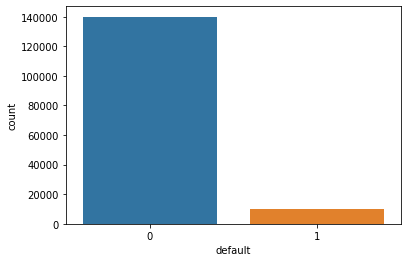

In [24]:
sns.countplot(loan["default"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

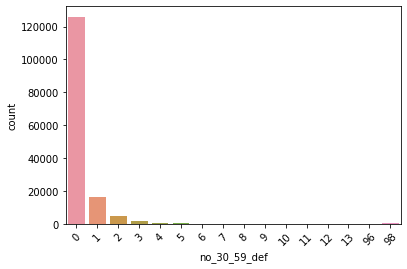

In [25]:
sns.countplot(loan["no_30_59_def"])
plt.xticks(rotation=45)

In [26]:
df1=loan[["no_30_59_def","default","cnt_open_loans"]]

In [27]:
df1.head()

,no_30_59_def,default,cnt_open_loans
0,2,1,13
1,0,0,4
2,1,0,2
3,0,0,5
4,1,0,7


In [28]:
col=list(df1.columns)

In [29]:
col

['no_30_59_def', 'default', 'cnt_open_loans']

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


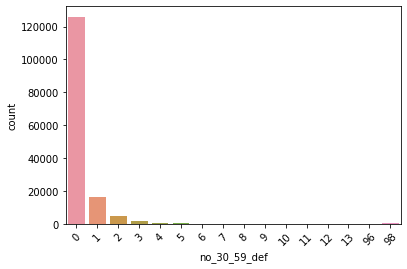

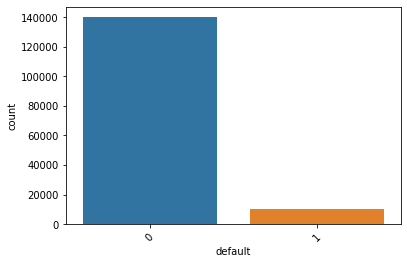

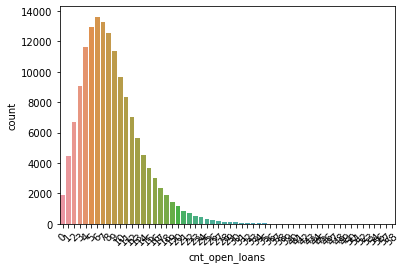

In [30]:
for i in col:
    plt.figure(i)
    abc=sns.countplot(df[i])
    plt.xticks(rotation=45)
    print(abc)

In [34]:
loan.head(2)

,Sr_No,default,revol_pct,age,no_30_59_def,DebtRatio,MonthlyIncome,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [35]:
loan.columns

Index(['Sr_No', 'default', 'revol_pct', 'age', 'no_30_59_def', 'DebtRatio',
       'MonthlyIncome', 'cnt_open_loans', 'no_of_90_late',
       'cnt_real_esate_loans', 'no_60_89_def', 'depdents'],
      dtype='object')

In [36]:
loan.dtypes

Sr_No                      int64
default                    int64
revol_pct                float64
age                        int64
no_30_59_def            category
DebtRatio                float64
MonthlyIncome            float64
cnt_open_loans          category
no_of_90_late           category
cnt_real_esate_loans    category
no_60_89_def            category
depdents                category
dtype: object

# Missing  value identification

In [37]:
def miss_identify(data):
    return data.isnull().sum()/len(data)*100

In [38]:
miss_identify(data=loan)

Sr_No                    0.000000
default                  0.000000
revol_pct                0.000000
age                      0.000000
no_30_59_def             0.000000
DebtRatio                0.000000
MonthlyIncome           19.820667
cnt_open_loans           0.000000
no_of_90_late            0.000000
cnt_real_esate_loans     0.000000
no_60_89_def             0.000000
depdents                 2.616000
dtype: float64

In [50]:
from sklearn.impute import SimpleImputer
def missing_val_treat(data):
    data1=data.select_dtypes(include="category")
    data2=data.select_dtypes(exclude="category")
    sm1=SimpleImputer(strategy="most_frequent")
    sm2=SimpleImputer(strategy="median")
    data3=pd.DataFrame(sm1.fit_transform(data1),columns=data1.columns)
    data4=pd.DataFrame(sm2.fit_transform(data2),columns=data2.columns)
    data5=pd.merge(data3,data4,left_index=True,right_index=True)
    return data5

In [51]:
loan1=missing_val_treat(data=loan)

In [52]:
loan1.head(2)

,no_30_59_def,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents,Sr_No,default,revol_pct,age,DebtRatio,MonthlyIncome
0,2,13,0,6,0,2,1.0,1.0,0.766127,45.0,0.802982,9120.0
1,0,4,0,0,0,1,2.0,0.0,0.957151,40.0,0.121876,2600.0


In [53]:
miss_identify(loan1)

no_30_59_def            0.0
cnt_open_loans          0.0
no_of_90_late           0.0
cnt_real_esate_loans    0.0
no_60_89_def            0.0
depdents                0.0
Sr_No                   0.0
default                 0.0
revol_pct               0.0
age                     0.0
DebtRatio               0.0
MonthlyIncome           0.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x28a4ddac648>,
 'caps': [<matplotlib.lines.Line2D at 0x28a4d7d7588>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a46fd8bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x28a4c423688>],
 'fliers': [<matplotlib.lines.Line2D at 0x28a4dea1888>],
 'means': []}

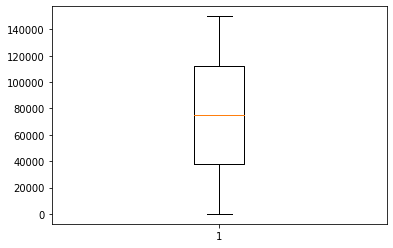

In [54]:
plt.boxplot(loan1["Sr_No"])

In [86]:
import researchpy as rp
def out_identify(data):
    data1=data.select_dtypes(exclude="object")
    col=list(data1.columns)
    for i in col:
        iqr=data1[i].quantile(0.75)-data1[i].quantile(0.25)
        lo=data1[i].quantile(0.25)-1.5*iqr
        uo=data1[i].quantile(0.75)+1.5*iqr
        data1[i]=np.where(data1[i]<lo,"lo",np.where(data1[i]>uo,"uo","nooutlier"))
    data3=data1.copy()
    data4=rp.summary_cat(data3)
    return data4
        
    

In [87]:
out_identify(data=loan1)

C:\Users\Koti\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Variable,Outcome,Count,Percent
0,Sr_No,nooutlier,150000,100.00
1,default,nooutlier,139974,93.32
2,,uo,10026,6.68
3,revol_pct,nooutlier,149237,99.49
4,,uo,763,0.51
5,age,nooutlier,149954,99.97
6,,uo,45,0.03
7,,lo,1,0.00
8,DebtRatio,nooutlier,118689,79.13
9,,uo,31311,20.87


In [88]:
loan1.columns

Index(['no_30_59_def', 'cnt_open_loans', 'no_of_90_late',
       'cnt_real_esate_loans', 'no_60_89_def', 'depdents', 'Sr_No', 'default',
       'revol_pct', 'age', 'DebtRatio', 'MonthlyIncome'],
      dtype='object')

In [89]:
loan1["MonthlyIncome"]=np.where(loan1["MonthlyIncome"]>loan1["MonthlyIncome"].quantile(0.95),loan1["MonthlyIncome"].median(),loan1["MonthlyIncome"])
loan1["DebtRatio"]=np.where(loan1["DebtRatio"]>loan1["DebtRatio"].quantile(0.95),loan1["DebtRatio"].median(),loan1["DebtRatio"])
loan1["age"]=np.where(loan1["age"]>loan1["age"].quantile(0.95),loan1["age"].median(),loan1["age"])
loan1["revol_pct"]=np.where(loan1["revol_pct"]>loan1["revol_pct"].quantile(0.95),loan1["revol_pct"].median(),loan1["revol_pct"])


In [90]:
loan1.head(2)

,no_30_59_def,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents,Sr_No,default,revol_pct,age,DebtRatio,MonthlyIncome
0,2,13,0,6,0,2,1.0,1.0,0.766127,45.0,0.802982,9120.0
1,0,4,0,0,0,1,2.0,0.0,0.957151,40.0,0.121876,2600.0


In [93]:
loan1.drop(["Sr_No"],axis=1,inplace=True)

In [94]:
import sweetviz as sv

In [95]:
my_report=sv.analyze(loan1)

:FEATURES DONE:                    |                     | [  0%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:14  -> (00:00 left)


Creating Associations graph... DONE!


In [100]:
my_report.show_html()

In [97]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(loan1,test_size=0.3,random_state=0)
print(train.shape,test.shape)

(105000, 11) (45000, 11)


In [98]:
my_report1 = sv.compare([train, "train"], [test, "test"], "default")

:FEATURES DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:14  -> (00:00 left)


Creating Associations graph... DONE!


In [101]:
my_report1.show_html()

In [102]:
my_report2 = sv.compare_intra(train, train["default"] == 1, 'left')

:FEATURES DONE:                    |                     | [  0%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)


Creating Associations graph... DONE!


In [105]:
my_report2.show_html()

In [107]:
my_report3=sv.analyze(loan1)

:FEATURES DONE:                    |                     | [  0%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:14  -> (00:00 left)


Creating Associations graph... DONE!


In [108]:
my_report3.show_html()

In [109]:
print(train.shape,test.shape)

(105000, 11) (45000, 11)


In [114]:
loan1.head(2)

,no_30_59_def,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents,default,revol_pct,age,DebtRatio,MonthlyIncome
0,2,13,0,6,0,2,1.0,0.766127,45.0,0.802982,9120.0
1,0,4,0,0,0,1,0.0,0.957151,40.0,0.121876,2600.0


In [115]:
loan1["default"]=loan1["default"].astype("int")

In [116]:
loan1.head(2)

,no_30_59_def,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents,default,revol_pct,age,DebtRatio,MonthlyIncome
0,2,13,0,6,0,2,1,0.766127,45.0,0.802982,9120.0
1,0,4,0,0,0,1,0,0.957151,40.0,0.121876,2600.0


In [117]:
from pycaret.classification import *

In [118]:
clf=setup(data=loan1,target="default")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1903
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [119]:
loan1.dtypes

no_30_59_def             object
cnt_open_loans           object
no_of_90_late            object
cnt_real_esate_loans     object
no_60_89_def             object
depdents                 object
default                   int32
revol_pct               float64
age                     float64
DebtRatio               float64
MonthlyIncome           float64
dtype: object

In [120]:
loan2=pd.get_dummies(loan1)
loan2.shape

(150000, 152)

In [122]:
clf=setup(data=loan1,target="default",silent=True,transformation=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4075
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [123]:
clf

(        cnt_open_loans  cnt_real_esate_loans  revol_pct       age  DebtRatio  \
 0             0.950011              2.402864   1.373168 -0.447353   0.283497   
 1            -0.872653             -1.181182   1.553339 -0.830647  -0.753440   
 2            -1.552290             -1.181182   1.236424 -0.984087  -0.844282   
 3            -0.597715             -1.181182   0.195176 -1.598644  -0.975046   
 4            -0.124909              0.299496   1.512406 -0.141008  -1.006347   
 ...                ...                   ...        ...       ...        ...   
 149995       -0.872653              0.299496  -0.880405  1.768936  -0.526101   
 149996       -0.872653              0.299496   0.440382 -0.523979   0.195523   
 149997        1.636070              0.299496   0.244210  0.547436  -0.268047   
 149998       -0.872653             -1.181182  -1.208140 -1.598644  -1.078883   
 149999        0.083457              1.053693   1.460757  1.005830  -0.476870   
 
         MonthlyIncome  no

In [124]:
clf=setup(data=loan1,target="default",silent=True,normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8440
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [125]:
clf

(        cnt_open_loans  cnt_real_esate_loans  revol_pct       age  DebtRatio  \
 0             0.883657              4.409546   1.391245 -0.448494  -0.304486   
 1            -0.865297             -0.901283   1.961852 -0.831267  -0.306064   
 2            -1.253953             -0.901283   1.068800 -0.984376  -0.306149   
 3            -0.670969             -0.901283  -0.198832 -1.596814  -0.306262   
 4            -0.282312             -0.016145   1.812761 -0.142275  -0.306288   
 ...                ...                   ...        ...       ...        ...   
 149995       -0.865297             -0.016145  -0.775746  1.771591  -0.305824   
 149996       -0.865297             -0.016145  -0.001877 -0.525049  -0.304687   
 149997        1.855298             -0.016145  -0.162287  0.546717  -0.305497   
 149998       -0.865297             -0.901283  -0.897242 -1.596814  -0.306346   
 149999       -0.087984              0.868993   1.642628  1.006044  -0.305767   
 
         MonthlyIncome  no

In [126]:
loan1.columns

Index(['no_30_59_def', 'cnt_open_loans', 'no_of_90_late',
       'cnt_real_esate_loans', 'no_60_89_def', 'depdents', 'default',
       'revol_pct', 'age', 'DebtRatio', 'MonthlyIncome'],
      dtype='object')

In [127]:
clf=setup(data=loan1,target="default",silent=True,numeric_features=["DebtRatio",'MonthlyIncome',"age","revol_pct"])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6111
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [128]:
clf

(        cnt_open_loans  cnt_real_esate_loans  revol_pct   age  DebtRatio  \
 0                 13.0                   6.0   0.766127  45.0   0.802982   
 1                  4.0                   0.0   0.957151  40.0   0.121876   
 2                  2.0                   0.0   0.658180  38.0   0.085113   
 3                  5.0                   0.0   0.233810  30.0   0.036050   
 4                  7.0                   1.0   0.907239  49.0   0.024926   
 ...                ...                   ...        ...   ...        ...   
 149995             4.0                   1.0   0.040674  74.0   0.225131   
 149996             4.0                   1.0   0.299745  44.0   0.716562   
 149997            18.0                   1.0   0.246044  58.0   0.366508   
 149998             4.0                   0.0   0.000000  30.0   0.000000   
 149999             8.0                   2.0   0.850283  64.0   0.249908   
 
         MonthlyIncome  no_30_59_def_0  no_30_59_def_1  no_30_59_def_10  \

In [129]:
clf=setup(data=loan1,target="default",silent=True,numeric_features=["DebtRatio",'MonthlyIncome',"age","revol_pct"],polynomial_features=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6812
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [130]:
clf

(        cnt_open_loans  cnt_real_esate_loans  revol_pct   age  DebtRatio  \
 0                 13.0                   6.0   0.766127  45.0   0.802982   
 1                  4.0                   0.0   0.957151  40.0   0.121876   
 2                  2.0                   0.0   0.658180  38.0   0.085113   
 3                  5.0                   0.0   0.233810  30.0   0.036050   
 4                  7.0                   1.0   0.907239  49.0   0.024926   
 ...                ...                   ...        ...   ...        ...   
 149995             4.0                   1.0   0.040674  74.0   0.225131   
 149996             4.0                   1.0   0.299745  44.0   0.716562   
 149997            18.0                   1.0   0.246044  58.0   0.366508   
 149998             4.0                   0.0   0.000000  30.0   0.000000   
 149999             8.0                   2.0   0.850283  64.0   0.249908   
 
         MonthlyIncome  revol_pct_Power2  no_30_59_def_0  no_30_59_def_1  

In [131]:
loan1.columns

Index(['no_30_59_def', 'cnt_open_loans', 'no_of_90_late',
       'cnt_real_esate_loans', 'no_60_89_def', 'depdents', 'default',
       'revol_pct', 'age', 'DebtRatio', 'MonthlyIncome'],
      dtype='object')

In [132]:
loan2=loan1[["age","MonthlyIncome","default"]]

In [133]:
loan2.head(2)

,age,MonthlyIncome,default
0,45.0,9120.0,1
1,40.0,2600.0,0


In [137]:
loan2["age_sqrt"]=np.sqrt(loan2["age"])
loan2["age_sq"]=np.square(loan2["age"])

In [138]:
loan2.head(2)

,age,MonthlyIncome,default,age_sqrt,age_sq
0,45.0,9120.0,1,6.708204,2025.0
1,40.0,2600.0,0,6.324555,1600.0


In [139]:
loan2["MonthlyIncome"].describe()

count    150000.000000
mean       5521.420427
std        2635.203517
min           0.000000
25%        3903.000000
50%        5400.000000
75%        6617.250000
max       13500.000000
Name: MonthlyIncome, dtype: float64

In [140]:
loan2["MonthlyIncome_sqrt"]=np.sqrt(loan2["MonthlyIncome"])
loan2["MonthlyIncome_sq"]=np.square(loan2["MonthlyIncome"])

In [141]:
loan2.head()

,age,MonthlyIncome,default,age_sqrt,age_sq,MonthlyIncome_sqrt,MonthlyIncome_sq
0,45.0,9120.0,1,6.708204,2025.0,95.498691,83174400.0
1,40.0,2600.0,0,6.324555,1600.0,50.990195,6760000.0
2,38.0,3042.0,0,6.164414,1444.0,55.154329,9253764.0
3,30.0,3300.0,0,5.477226,900.0,57.445626,10890000.0
4,49.0,5400.0,0,7.000000,2401.0,73.484692,29160000.0


In [142]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(loan2[["age"]],loan2[["default"]])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
pred=lg.predict_proba(loan2[["age"]])[::,1]

In [144]:
pred

array([0.07436389, 0.0870709 , 0.09268312, ..., 0.04891095, 0.11849238,
       0.04017536])

In [147]:
from sklearn.metrics import auc,roc_auc_score

In [148]:
roc_auc_score(loan2["default"],pred)

0.6277889120447097

In [155]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(loan2[["MonthlyIncome_sq"]],loan2[["default"]])
pred=lg.predict_proba(loan2[["MonthlyIncome_sq"]])[::,1]
from sklearn.metrics import auc,roc_auc_score
roc_auc_score(loan2["default"],pred)

0.5683561467377013

In [158]:
print(train.shape,test.shape)

(105000, 11) (45000, 11)


In [159]:
x_train=train.drop(["default"],axis=1)
y_train=train["default"]
x_test=test.drop(["default"],axis=1)
y_test=test["default"]

In [160]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
lg.score(x_train,y_train)

0.9333142857142858

In [162]:
lg.score(x_test,y_test)

0.9327111111111112

In [163]:
loan2=pd.get_dummies(loan1)

In [164]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(loan2,test_size=0.3,random_state=0)
print(train.shape,test.shape)

(105000, 152) (45000, 152)


In [165]:
x_train=train.drop(["default"],axis=1)
y_train=train["default"]
x_test=test.drop(["default"],axis=1)
y_test=test["default"]

In [166]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.9345904761904762

In [167]:
lg.score(x_test,y_test)

0.9333555555555556

In [176]:

lr=create_model("lr",fold=3)
plot_model(lr,'auc')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to 

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 800x550 with 1 Axes>

In [178]:
tune_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9305,0.8403,0.1327,0.4326,0.2031,0.1773
1,0.9339,0.8480,0.1154,0.5260,0.1893,0.1693
2,0.9317,0.8335,0.1239,0.4603,0.1953,0.1718
3,0.9324,0.8463,0.1211,0.4775,0.1932,0.1708
4,0.9336,0.8344,0.1396,0.5131,0.2195,0.1965
5,0.9342,0.8407,0.1282,0.5325,0.2067,0.1855
6,0.9343,0.8566,0.1524,0.5297,0.2367,0.2132
7,0.9311,0.8391,0.1225,0.4456,0.1922,0.1682
8,0.9342,0.8404,0.1268,0.5329,0.2048,0.1839
9,0.9338,0.8483,0.1341,0.5165,0.2129,0.1906


LogisticRegression(C=7.9430000000000005, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8425, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(loan1['default'])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to 

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 800x550 with 1 Axes>